

# Project: Investigate a Dataset (Medical Appointments No-Show Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [79]:
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")

In [80]:
df.shape

(110527, 14)

In [81]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [84]:
#change column names to lower case
df.columns = [x.lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Check datatypes for columns**

In [85]:
type(df['patientid'][0])

numpy.float64

In [86]:
type(df['appointmentday'][0])

str

In [87]:
type(df['scheduledday'][0])

str

In [88]:
type(df['neighbourhood'][0])

str

Based on above analysis datatypes of patientid, appointmentday & scheduledday needs to be fixed

**Check NULLS**

In [89]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

**Check overall dataframe**

In [90]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [91]:
df.describe(include='all')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


**Check Uniques**

In [92]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

In [93]:
df.appointmentday.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

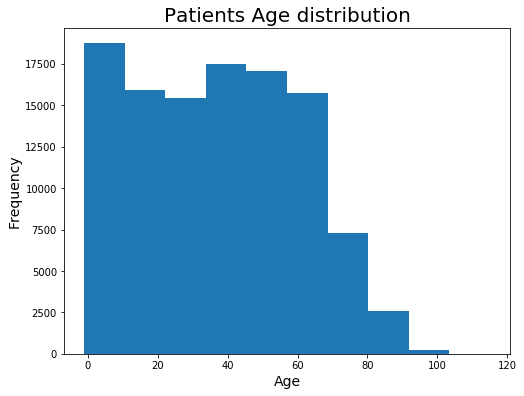

In [94]:
df['age'].plot(kind='hist',figsize=(8,6))
plt.title('Patients Age distribution',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14);

In [95]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

Based on above analysis we need to eliminate records which have age =-1 and 115. Negative age isn't possible and as per the [List of the oldest people by country](https://en.wikipedia.org/wiki/List_of_the_oldest_people_by_country), 115 age in Brazil isn't possible. 

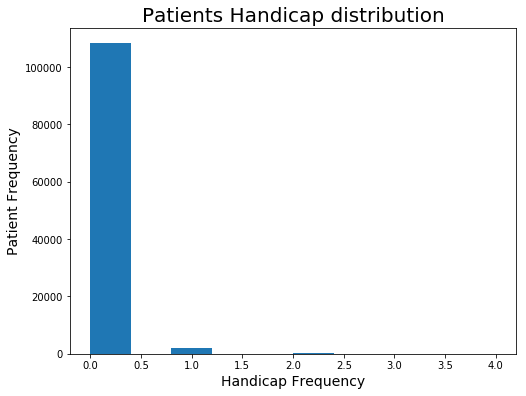

In [96]:
df['handcap'].plot(kind='hist',figsize=(8,6))
plt.title('Patients Handicap distribution',fontsize=20)
plt.xlabel('Handicap Frequency',fontsize=14)
plt.ylabel('Patient Frequency',fontsize=14);

In [97]:
df.handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [98]:
df.handcap.value_counts()/len(df)*100

0    97.972441
1     1.847512
2     0.165570
3     0.011762
4     0.002714
Name: handcap, dtype: float64

In [99]:
df.corr()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
patientid,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
appointmentid,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [100]:
unique_patients_by_gender=df.groupby(['no-show','gender'])['patientid'].nunique()

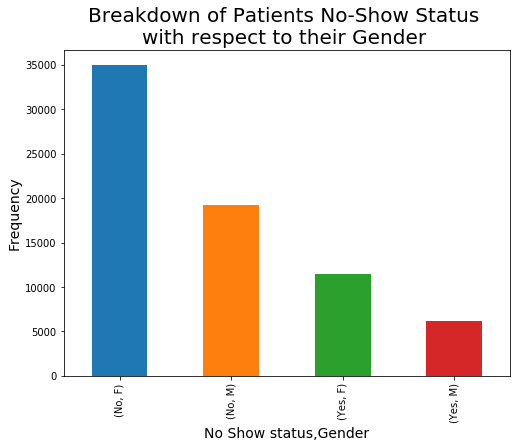

In [101]:
unique_patients_by_gender.plot(kind='bar',figsize=(8,6))
plt.title('Breakdown of Patients No-Show Status \nwith respect to their Gender ',fontsize=20)
plt.xlabel('No Show status,Gender',fontsize=14)
plt.ylabel('Frequency',fontsize=14);

**Check duplicates**

In [102]:
sum(df.duplicated())

0

In [103]:
sum(df.patientid.duplicated())

48228

In [104]:
sum(df.appointmentid.duplicated())

0

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

**Change Data types for PatientID, Appointment Day & Scheduled Day**

In [105]:
#change datatype for Patient ID
df['patientid']=df['patientid'].astype('int64')

In [106]:
#change dataype for Appointment Day & Scheduled Day
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

[Above logic reference](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime)

In [107]:
#verify changes to data types
df.dtypes

patientid                  int64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no-show                   object
dtype: object

In [108]:
#verify changes to data types continued
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [110]:
#remove row with age -1
df=df[df['age']!= -1]
#verify the row with age -1 is eliminated from dataframe
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [111]:
#remove rows with age 115
df=df[df['age']!= 115]
#verify the row with age 115 is eliminated from dataframe
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
6      1521
30     1521
3      1513
17     1509
32     1505
5      1489
18     1487
44     1487
58     1469
46     1460
45     1453
       ... 
71      695
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
100       4
102       2
99        1
Name: age, Length: 102, dtype: int64

In [112]:
df.shape

(110521, 14)

In [113]:
#replace no-show to no_show
df.rename(columns={'no-show': 'no_show'}, inplace=True)

In [114]:
#correct spelling of column hipertension to hypertension
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)

In [115]:
#verify the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110521 non-null int64
appointmentid     110521 non-null int64
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hypertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


In [116]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Create a new column Show that have opposite values to column no_show for easier understanding**

[Link](https://stackoverflow.com/questions/50085092/python-how-to-convert-1-0-to-yes-no-in-pandas-dataframe?noredirect=1&lq=1) used to refer for below logic of mapping.

In [117]:
df['show']=df['no_show'].map({'No':'Yes','Yes':'No'})
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes


**_Verify number of values in each column_**

In [118]:
df.no_show.value_counts()

No     88205
Yes    22316
Name: no_show, dtype: int64

In [119]:
df.show.value_counts()

Yes    88205
No     22316
Name: show, dtype: int64

Delete **_no__show_** column from dataframe

In [120]:
del df['no_show']
#verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110521 non-null int64
appointmentid     110521 non-null int64
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hypertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
show              110521 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110521 non-null int64
appointmentid     110521 non-null int64
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hypertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
show              110521 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


**Percentage of patients who showed to their appointment:-**

In [122]:
overall_patients = df['show'].value_counts()/len(df)*100

In [123]:
overall_patients

Yes    79.808362
No     20.191638
Name: show, dtype: float64

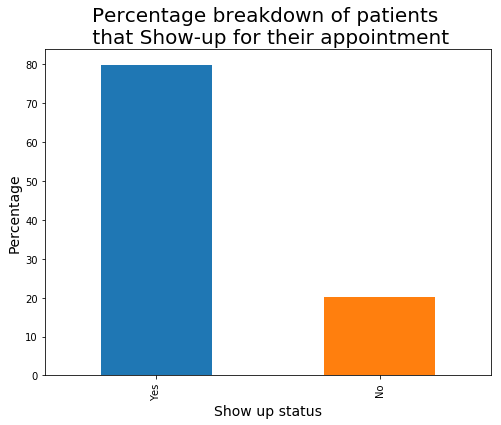

In [124]:
overall_patients.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients \n that Show-up for their appointment',fontsize=20)
plt.xlabel('Show up status',fontsize=14)
plt.ylabel('Percentage',fontsize=14);

From above analysis we can interpret that **79.80%** patients **_showed up_** to their appointment and **20.20%** patients were **_defaulters._**

_Does **Gender** has significant impact on whether patient show up to their appointment?_

[Link](https://discuss.analyticsvidhya.com/t/how-to-find-percentage-of-total-with-groupby-pandas/66092/4) refers to the percentage of total analysis with groupby for below analysis.

In [125]:
#convert F to Female and M to Male for gender column
df['gender'] = df['gender'].map({'F': 'Female', 'M': 'Male'})

In [126]:
df_gender = pd.crosstab(df['show'],df['gender']).apply(lambda r: r/r.sum(), axis=0)*100

In [127]:
df_gender

gender,Female,Male
show,,
No,20.312108,19.967948
Yes,79.687892,80.032052


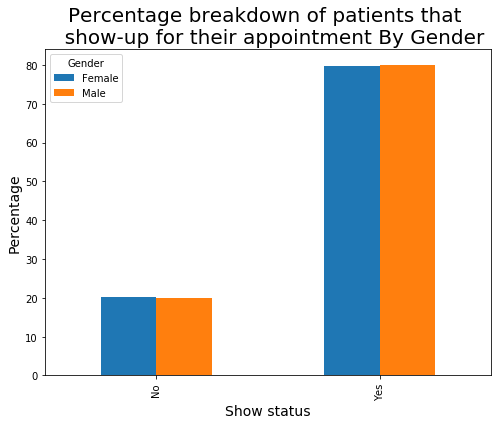

In [128]:
df_gender.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Gender',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Gender',loc='best');

_Gender doesn't have any significant variance incomparison with overall patients to whether patients show up for their appointment_

_Does **Scholarship** has significant impact on whether patient show up to their appointment?_

In [129]:
#convert 0 to No and 1 to Yes for scholarship column
df['scholarship'] = df['scholarship'].map({True: 'Yes', False: 'No'})

In [130]:
df_scholarship = pd.crosstab(df['show'],df['scholarship']).apply(lambda r: r/r.sum(), axis=0)*100
df_scholarship

scholarship,No,Yes
show,,
No,19.805338,23.736304
Yes,80.194662,76.263696


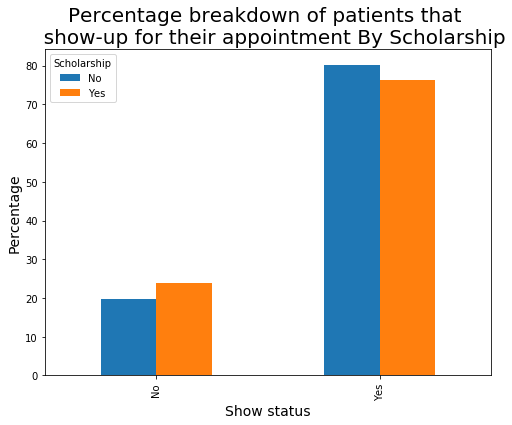

In [131]:
df_scholarship.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Scholarship',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Scholarship',loc='best');

Patients **_with_** scholarship **don't** tend to show up for their appointment. 
Only **76.23%** of the patients with scholorship show up to their appointment incomparison with **80.19%** patients without.

_Does **Sms__received** has significant impact on whether patient show up to their appointment?_

In [132]:
#convert 0 to No and 1 to Yes for sms_received column
df['sms_received'] = df['sms_received'].map({True: 'Yes', False: 'No'})

In [133]:
df_sms_received = pd.crosstab(df['show'],df['sms_received']).apply(lambda r: r/r.sum(), axis=0)*100
df_sms_received

sms_received,No,Yes
show,,
No,16.700426,27.575322
Yes,83.299574,72.424678


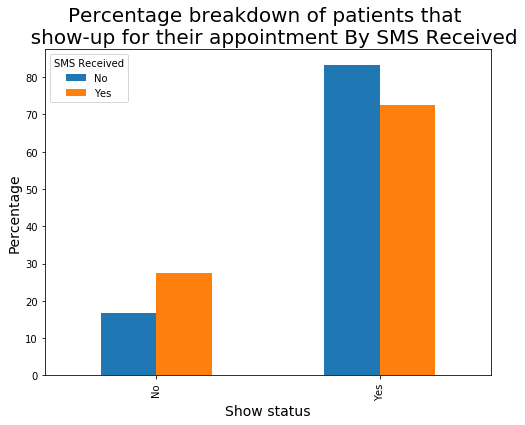

In [134]:
df_sms_received.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By SMS Received',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='SMS Received',loc='upper left');

Patients **_who received_** SMS **don't** tend to show up for their appointment. 
Only **72.42%** of the patients who received SMS show up to their appointment incomparison with **83.30%** patients without.

_Do patients with ailments such as **diabetes & hypertension** show up to their appointment more often or less?_

In [135]:
#convert 0 to No and 1 to Yes for hypertension column
df['hypertension'] = df['hypertension'].map({True: 'Yes', False: 'No'})
#convert 0 to No and 1 to Yes for diabetes column
df['diabetes'] = df['diabetes'].map({True: 'Yes', False: 'No'})

In [136]:
#calculate percentahe of total for hypertension grouped by show column
df_hypertension = pd.crosstab(df['show'],df['hypertension']).apply(lambda r: r/r.sum(), axis=0)*100
df_hypertension

hypertension,No,Yes
show,,
No,20.901478,17.302752
Yes,79.098522,82.697248


In [137]:
#calculate percentahe of total for diabetes grouped by show column
df_diabetes = pd.crosstab(df['show'],df['diabetes']).apply(lambda r: r/r.sum(), axis=0)*100
df_diabetes

diabetes,No,Yes
show,,
No,20.361091,18.003273
Yes,79.638909,81.996727


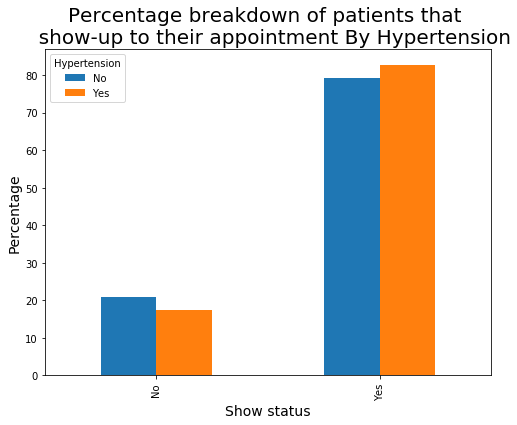

In [138]:
#bar plot to show how hypertension patients show up in comparison with patients without hypertension to their appointments
df_hypertension.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up to their appointment By Hypertension',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Hypertension',loc='best');

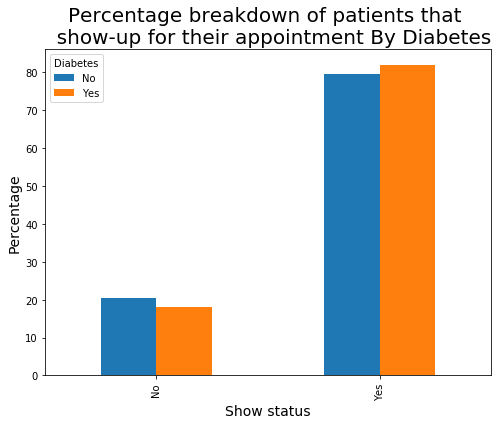

In [139]:
#bar plot to show how diabetes patients show up in comparison with patients without diabetes to their appointments
df_diabetes.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Diabetes',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Diabetes',loc='best');

_Patients suffering from **Hypertension** or **Diabetes** have low significant variance to show up for their appointments incomparison with patients not suffering from such ailments._
_Patients with ailments do tend to show up for their appointment more often but the variance is not more than 3% in comparison with patients those who don't suffer from such ailments._

_Do patients who are suffering from  **alcoholism** show up to their appointment more often or less?_

In [140]:
#convert 0 to No and 1 to Yes for alcoholism column
df['alcoholism'] = df['alcoholism'].map({True: 'Yes', False: 'No'})

In [141]:
#calculate percentahe of total for diabetes grouped by show column
df_alcoholism = pd.crosstab(df['show'],df['alcoholism']).apply(lambda r: r/r.sum(), axis=0)*100
df_alcoholism

alcoholism,No,Yes
show,,
No,20.192981,20.14881
Yes,79.807019,79.85119


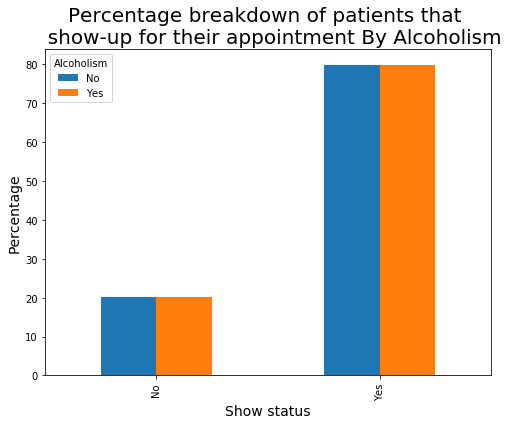

In [142]:
#bar plot to show how alcoholism patients show up in comparison with patients without alcoholism to their appointments
df_alcoholism.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Alcoholism',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Alcoholism',loc='best');

_Patients suffering from **Alcoholism** have negligible variance to show up for their appointments incomparison with patients not suffering from **Alcoholism**_

### Does patient's age or age group has any role in whether they show up to their appointment

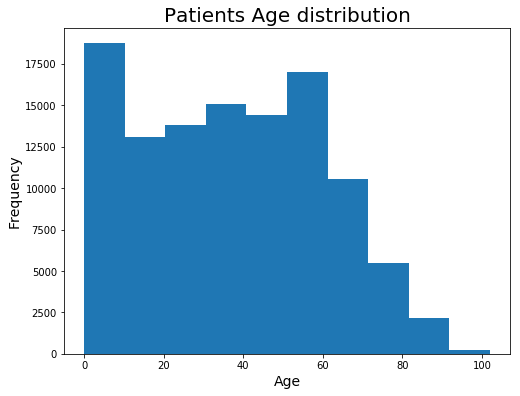

In [143]:
#age histogram
df['age'].plot(kind='hist',figsize=(8,6))
plt.title('Patients Age distribution',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14);

**Create groups of age as defined in [Brazil Age Structure](https://www.indexmundi.com/brazil/age_structure.html). Refer to logic behind how to create age groups from [Link](https://stackoverflow.com/questions/16349389/grouping-data-by-value-ranges).**

In [144]:
df.shape

(110521, 14)

In [145]:
labels = np.array('Children Early_Working_Age Prime_Working_Age Mature_Working_Age Elderly'.split())
df['age_groups']=pd.cut(df['age'],bins=[0,14,24,54,64,102],labels=labels)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,age_groups
0,29872499824296,5642903,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes,Mature_Working_Age
1,558997776694438,5642503,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes,Mature_Working_Age
2,4262962299951,5642549,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0,No,Yes,Mature_Working_Age
3,867951213174,5642828,Female,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Yes,Children
4,8841186448183,5642494,Female,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Yes,Mature_Working_Age


In [146]:
df.age_groups.shape

(110521,)

In [147]:
#calculate percentahe of total for differnt age_groups grouped by show column
df_age_groups = pd.crosstab(df['show'],df['age_groups']).apply(lambda r: r/r.sum(), axis=0)*100
df_age_groups

age_groups,Children,Early_Working_Age,Prime_Working_Age,Mature_Working_Age,Elderly
show,,,,,
No,21.741556,25.267666,20.96323,16.018448,15.489338
Yes,78.258444,74.732334,79.03677,83.981552,84.510662


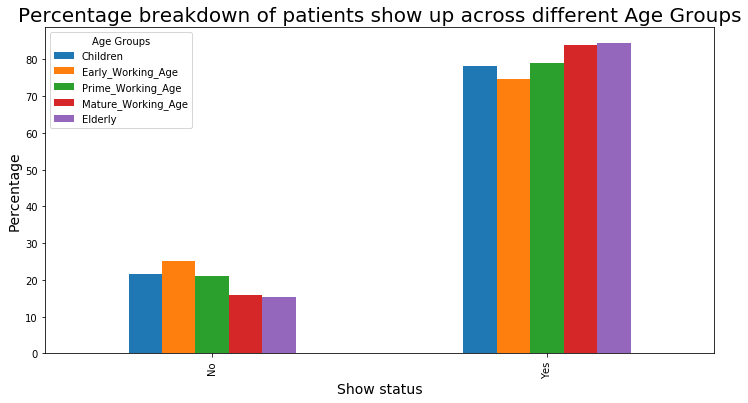

In [148]:
#bar plot to show how patients from different age_groups show up to their appointments
df_age_groups.plot(kind='bar',figsize=(12,6))
plt.title('Percentage breakdown of patients show up across different Age Groups',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Age Groups',loc='best');

* **Early Working Age** patients **_don't_** show up to their appointments in most signifcant manner. They are the biggest group of defaulters to show up. Only **74.73%** of Early Working Age patients show up.
* **Mature Working Age & Elderly** patients tend to show to up to their appointments. **Mature Working Age** patients show to their appointments 83.98% and **Elderly** patients have highest show up rate among age groups with 84.51%.

### Does weekday have any significance on patients showing up to thier appointment?

**Add new column appointmentday_weekday that contains weekday of the Appointment Day. Refer to [Link](https://stackoverflow.com/questions/39548139/faster-way-of-converting-date-column-to-weekday-name-in-pandas)**

In [149]:
df['appointmentday_weekday'] = pd.to_datetime(df['appointmentday'], format='%m/%d/%y').dt.weekday_name
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show,age_groups,appointmentday_weekday
0,29872499824296,5642903,Female,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,0,No,Yes,Mature_Working_Age,Friday
1,558997776694438,5642503,Male,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,0,No,Yes,Mature_Working_Age,Friday
2,4262962299951,5642549,Female,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,No,No,No,No,0,No,Yes,Mature_Working_Age,Friday
3,867951213174,5642828,Female,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,0,No,Yes,Children,Friday
4,8841186448183,5642494,Female,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,0,No,Yes,Mature_Working_Age,Friday


In [150]:
df.appointmentday_weekday.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22712
Friday       19018
Thursday     17245
Saturday        39
Name: appointmentday_weekday, dtype: int64

In [151]:
#calculate percentage of total for differnt appointment weekdays grouped by show column
df_appointment_weekday = pd.crosstab(df['show'],df['appointmentday_weekday']).apply(lambda r: r/r.sum(), axis=0)*100
df_appointment_weekday

appointmentday_weekday,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
show,,,,,,
No,21.227258,20.645474,23.076923,19.344738,20.093604,19.689179
Yes,78.772742,79.354526,76.923077,80.655262,79.906396,80.310821


**We can see there is significant drop in patients showing up to thier appointment on Saturday and a low drop on Friday in comparison with rest of the week.**

In [152]:
df.appointmentday_weekday.value_counts()/len(df)*100

Wednesday    23.404602
Tuesday      23.199211
Monday       20.549941
Friday       17.207590
Thursday     15.603369
Saturday      0.035287
Name: appointmentday_weekday, dtype: float64

**_We can interpret from above anlysis that only .03% of the patients had theri appoinment. Hence we cannnot make a clear analysis of whether day of week affect patients showing up to thier appointment._**

# Conclusions:-

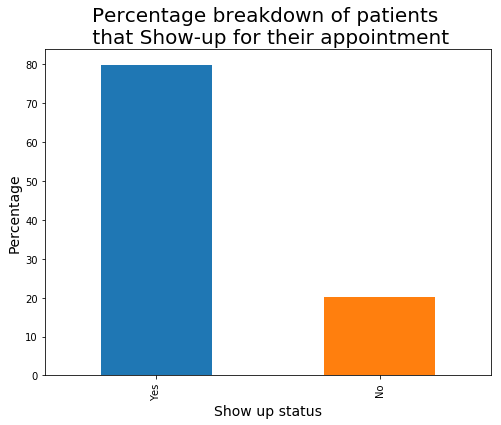

In [153]:
overall_patients.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients \n that Show-up for their appointment',fontsize=20)
plt.xlabel('Show up status',fontsize=14)
plt.ylabel('Percentage',fontsize=14);

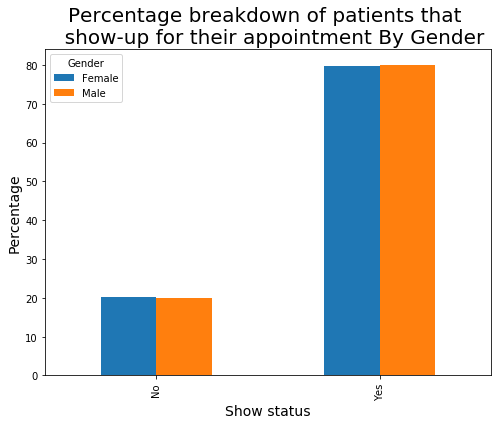

In [154]:
df_gender.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Gender',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Gender',loc='best');

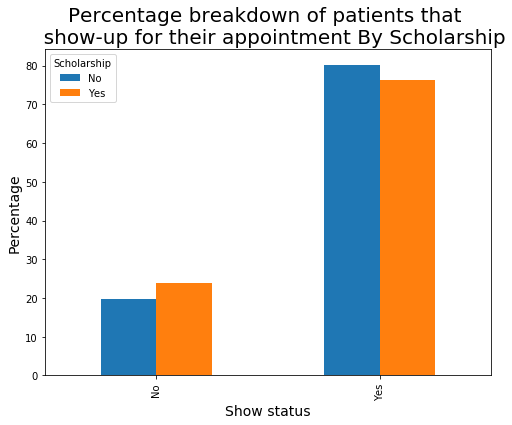

In [155]:
df_scholarship.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Scholarship',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Scholarship',loc='best');

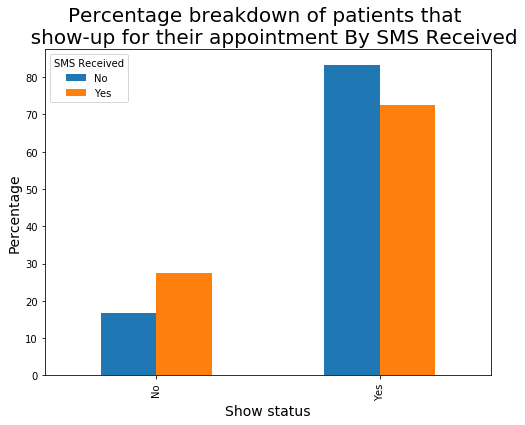

In [156]:
df_sms_received.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By SMS Received',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='SMS Received',loc='upper left');

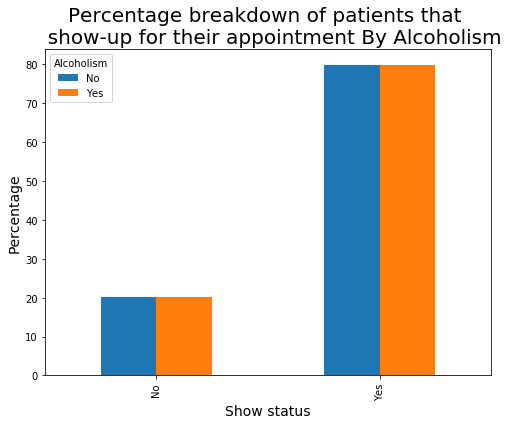

In [157]:
#bar plot to show how alcoholism patients show up in comparison with patients without alcoholism to their appointments
df_alcoholism.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Alcoholism',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Alcoholism',loc='best');

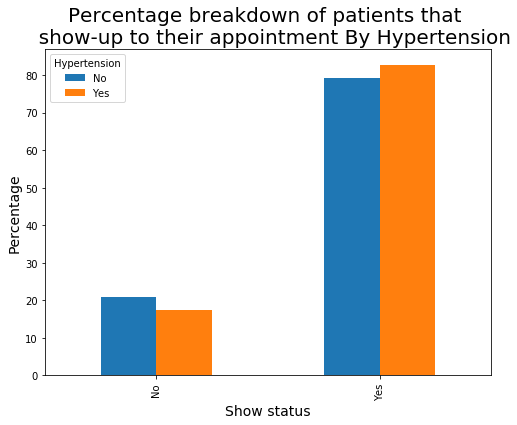

In [158]:
#bar plot to show how hypertension patients show up in comparison with patients without hypertension to their appointments
df_hypertension.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up to their appointment By Hypertension',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Hypertension',loc='best');

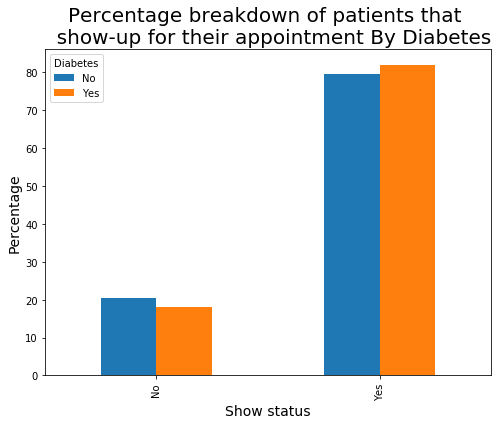

In [159]:
#bar plot to show how diabetes patients show up in comparison with patients without diabetes to their appointments
df_diabetes.plot(kind='bar',figsize=(8,6))
plt.title('Percentage breakdown of patients that \n  show-up for their appointment By Diabetes',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Diabetes',loc='best');

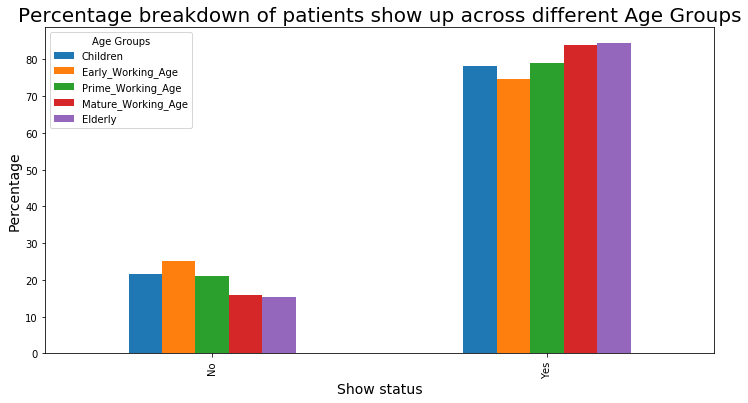

In [160]:
#bar plot to show how patients from different age_groups show up to their appointments
df_age_groups.plot(kind='bar',figsize=(12,6))
plt.title('Percentage breakdown of patients show up across different Age Groups',fontsize=20)
plt.xlabel('Show status',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.legend(title='Age Groups',loc='best');

## Conclusion Summary - _Medical Appointments No-Show Analysis_
* _Gender doesn't have any significant variance incomparison with overall patients to whether patients show up for their appointment_
* Patients **_with_** scholarship **don't** tend to show up for their appointment. Only **76.23%** of the patients with scholorship show up to their appointment incomparison with **80.19%** patients without. Hence the process behind granting scholarshio needs to be revamped. 
* Patients **_who received_** SMS **don't** tend to show up for their appointment. Only **72.42%** of the patients who received SMS show up to their appointment incomparison with **83.30%** patients without. It can be advised that the patients to who sm is been sent they are sent another set of sms for reminder on the day before the appoint or something like that as patients without sms are already showing up for the appointment.
* _Patients suffering from **Hypertension** or **Diabetes** have low significant variance to show up for their appointments incomparison with patients not suffering from such ailments._ _Patients with ailments do tend to show up for their appointment more often but the variance is not more than 3% in comparison with patients those who don't suffer from such ailments._
* Patients suffering from alcoholism and those without have similar tendency to show up to the appointment. More investigation needs to be done here. 
* **Early Working Age** patients **_don't_** show up to their appointments in most signifcant manner. They are the biggest group of defaulters to show up. Only **74.73%** of Early Working Age patients show up.
* **Mature Working Age & Elderly** patients tend to show to up to their appointments. **Mature Working Age** patients show to their appointments 83.98% and **Elderly** patients have highest show up rate among age groups with 84.51%.
* Hence more analysis needs to be done on the patients from **Early working age** group to idendity if any pattern which could be reason behind them not showing more often to thier appointments as in comparison with **Mature Working Age & Elderly**
### _Limitations_

* Due to less number of records having appointment on Saturday (**.03%**), we are unable to predict if the weekday has any impact on whether patients show up to thier appointments. 
* We cannot interpret if people those are handicap shall show up to thier appointments or not as **97.97%** patients are not handicap. Hence, we couldn't do any analysis.

In [161]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0